#1)Предварительная обработка данных:
   Нормализация: Масштабирование данных,нормализация пиксельных значений в диапазон [0, 1] 0-черный, 1- белый
#2)Архитектура сети:
  Один скрытый слой из 128 неиронов.
#3)Функция активации:
  Relu
#4)Метод регуляризации:
  Dropout
#5)Метод оптимизации:
  SGD
#6)Параметр обучения:
  Эпохи: Количество проходов по всему датасету (20).

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

4

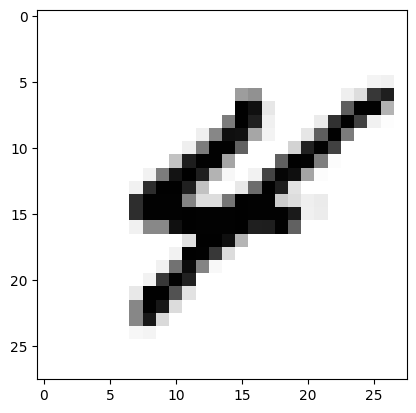

In [ ]:
# Загрузка обучающей и тестовой выборки датасета MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#нормализация входных данных
x_train, x_test = x_train / 255.0, x_test / 255.0
#визуализация картинки с рук.цифрой из датасета
plt.imshow(x_train[44447].reshape((28, 28)), cmap='Greys')
y_train[44447]

#Functional API

In [ ]:
# Определение модели с использованием Functional API
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6)
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
# Вывод структуры модели
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=32, callbacks=callback)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8043 - accuracy: 0.7833 - val_loss: 0.3879 - val_accuracy: 0.8984
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4217 - accuracy: 0.8798 - val_loss: 0.3105 - val_accuracy: 0.9144
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3546 - accuracy: 0.8980 - val_loss: 0.2762 - val_accuracy: 0.9238
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3177 - accuracy: 0.9090 - val_loss: 0.2509 - val_accuracy: 0.9301
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2884 - accuracy: 0.9177 - val_loss: 0.2310 - val_accuracy: 0.9362
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2675 - accuracy: 0.9241 - val_loss: 0.2178 - val_accuracy: 0.9395
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2503 - accuracy: 0.9293 - val_loss: 0.2049 - val_accuracy:

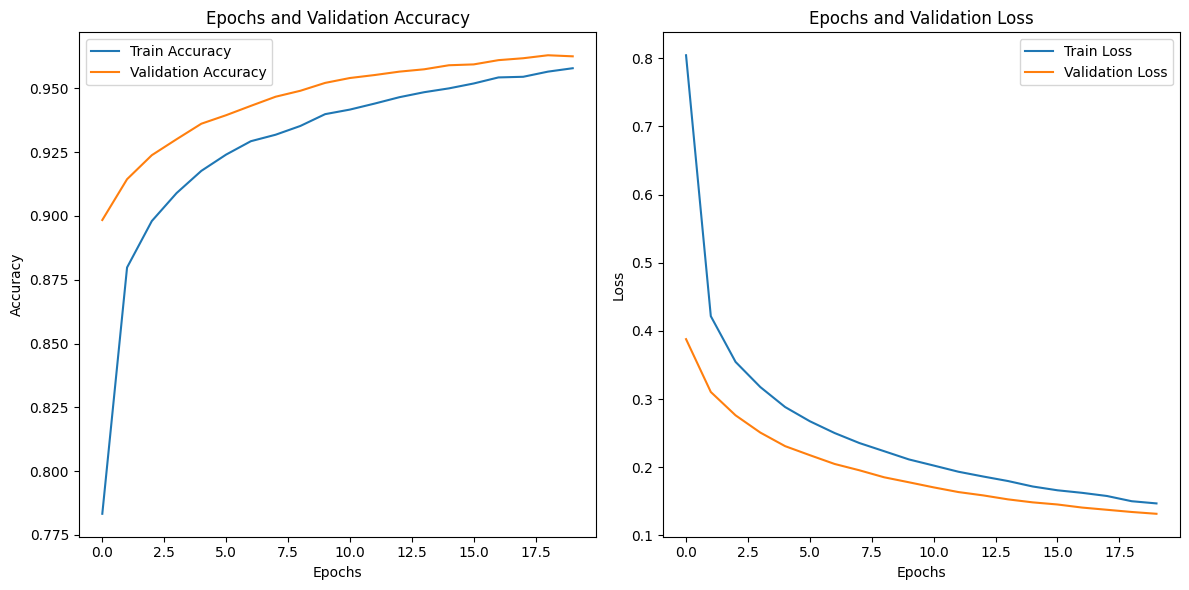

In [ ]:
# Построение графиков точности и потерь
plt.figure(figsize=(12, 6))
# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs and Validation Accuracy')
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()